# Run Comparisons

1. Runs the model at 3 different sets of inputs
2. Plots the 6 resulting lines
3. Cleans up the files

## Imports and settings

Set the ```initial_plants``` variable to one of the provided options

They represent the following power distributions:

| Name    | Coal | Gas | Nuclear | Wind |
|---------|------|-----|---------|------|
| ninety  | 0.5  | 0.4 | 0.1     | 0.0  |
| seventy | 0.5  | 0.2 | 0.2     | 0.1  |
| fifty   | 0.3  | 0.2 | 0.3     | 0.2  |





In [23]:
from functions.combinefunctions import combine

initial_plants = "ninety"           # An initial state with 90% fossil fuel usage
# initial_plants = "seventy"          # An initial state with 70% fossil fuel usage
# initial_plants = "fifty"            # An initial state with 50% fossil fuel usage

combined = combine(initial_plants)


## Optional: Rebuild the model

Uncomment these lines to rebuild the model with Maven

In [24]:
# ! cd ../model/ && mvn clean compile assembly:single -q && cd ../model/
# ! mv ../model/target/model-1.0-SNAPSHOT-jar-with-dependencies.jar model.jar && echo "Built and moved the model\n"

## Run the model

In [25]:
call = combined.get_data_call()

! cd temp && $call 

Finished 100 Tax runs with tax rate 30 using seeds in the range [1, 100]
Finished 100 Trade runs with cap reduction rate 1.0 using seeds in the range [1, 100]
Finished 100 Tax runs with tax rate 60 using seeds in the range [1, 100]
Finished 100 Trade runs with cap reduction rate 2.5 using seeds in the range [1, 100]
Finished 100 Tax runs with tax rate 120 using seeds in the range [1, 100]
Finished 100 Trade runs with cap reduction rate 5.0 using seeds in the range [1, 100]


## Plot the data

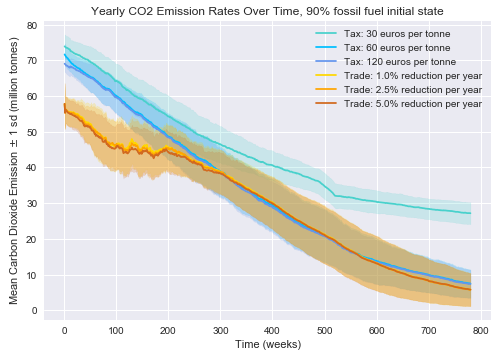

In [26]:
combined.get_plots()

## Run the statistical tests

In [27]:
a, b, c = combined.statistics()
a



,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Measure,c120,c1_0,False,True,0.765056,200.0,two-sided,4.451399e-01,0.201,0.107254
1,Measure,c120,c2_5,False,True,1.071651,200.0,two-sided,2.851683e-01,0.262,0.150236
2,Measure,c120,c30,False,True,-8.451759,200.0,two-sided,5.912847e-15,9.051e+11,-1.184862
3,Measure,c120,c5_0,False,True,1.557390,200.0,two-sided,1.209589e-01,0.475,0.218332
4,Measure,c120,c60,False,True,-0.404294,200.0,two-sided,6.864285e-01,0.165,-0.056678
5,Measure,c1_0,c2_5,False,True,0.299560,200.0,two-sided,7.648242e-01,0.16,0.041996
6,Measure,c1_0,c30,False,True,-9.774132,200.0,two-sided,1.081484e-18,3.736e+15,-1.370247
7,Measure,c1_0,c5_0,False,True,0.807684,200.0,two-sided,4.202318e-01,0.208,0.113230
8,Measure,c1_0,c60,False,True,-1.185950,200.0,two-sided,2.370492e-01,0.296,-0.166260
9,Measure,c2_5,c30,False,True,-10.443243,200.0,two-sided,1.179627e-20,3.015e+17,-1.464050


## Show the ten year pairwise t-test

In [28]:
b


,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Measure,c120,c1_0,False,True,-0.425071,200.0,two-sided,6.712421e-01,0.167,-0.059591
1,Measure,c120,c2_5,False,True,-0.348148,200.0,two-sided,7.280950e-01,0.162,-0.048807
2,Measure,c120,c30,False,True,-16.626934,200.0,two-sided,1.473516e-39,1.039e+36,-2.330949
3,Measure,c120,c5_0,False,True,-0.355984,200.0,two-sided,7.222274e-01,0.163,-0.049906
4,Measure,c120,c60,False,True,-0.328969,200.0,two-sided,7.425237e-01,0.161,-0.046118
5,Measure,c1_0,c2_5,False,True,0.074917,200.0,two-sided,9.403553e-01,0.154,0.010503
6,Measure,c1_0,c30,False,True,-14.249019,200.0,two-sided,2.927166e-32,6.829e+28,-1.997586
7,Measure,c1_0,c5_0,False,True,0.067718,200.0,two-sided,9.460781e-01,0.153,0.009493
8,Measure,c1_0,c60,False,True,0.117738,200.0,two-sided,9.063935e-01,0.154,0.016506
9,Measure,c2_5,c30,False,True,-14.508518,200.0,two-sided,4.633254e-33,4.179e+29,-2.033966


## Show the fifteen year pairwise t-test

In [29]:
c

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Measure,c120,c1_0,False,True,2.545965,200.0,two-sided,1.165094e-02,3.091,0.356922
1,Measure,c120,c2_5,False,True,2.676698,200.0,two-sided,8.052153e-03,4.225,0.375249
2,Measure,c120,c30,False,True,-39.780035,200.0,two-sided,5.993631e-97,7.472e+92,-5.576809
3,Measure,c120,c5_0,False,True,2.626529,200.0,two-sided,9.293917e-03,3.741,0.368216
4,Measure,c120,c60,False,True,-0.143174,200.0,two-sided,8.862968e-01,0.155,-0.020072
5,Measure,c1_0,c2_5,False,True,0.105255,200.0,two-sided,9.162787e-01,0.154,0.014756
6,Measure,c1_0,c30,False,True,-38.584026,200.0,two-sided,1.333580e-94,3.484e+90,-5.409139
7,Measure,c1_0,c5_0,False,True,0.052861,200.0,two-sided,9.578954e-01,0.153,0.007411
8,Measure,c1_0,c60,False,True,-2.682422,200.0,two-sided,7.920432e-03,4.285,-0.376052
9,Measure,c2_5,c30,False,True,-39.024838,200.0,two-sided,1.792377e-95,2.557e+91,-5.470937


In [30]:
! rm temp/*.csv && rm temp/clean/*.csv